<a href="https://colab.research.google.com/github/Jaime-Gomez-Vera/Metodos-Numericos/blob/main/interpolaci%C3%B3n_de_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

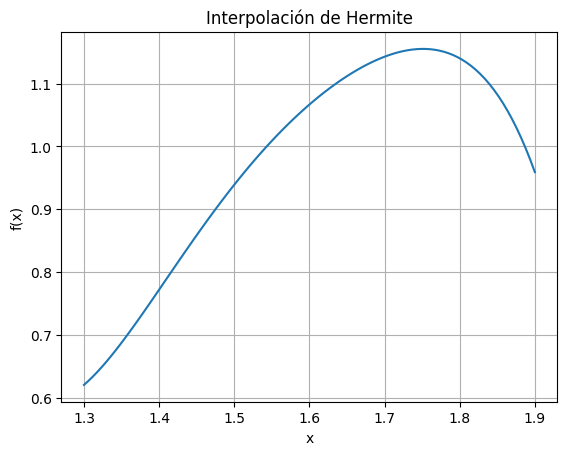

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def hermite_interpolation(points):
    n = len(points)
    coefficients = [0.0] * (2 * n)
    for i in range(n):
        coefficients[2 * i] = points[i][1]

    for i in range(1, 2 * n, 2):
        for j in range(2 * n - 1, i - 1, -1):
            coefficients[j] = (coefficients[j] - coefficients[j - 1]) / (points[(j // 2)][0] - points[(j // 2) - 1][0])

    def interpolate(x):
        result = coefficients[-1]
        for i in range(2 * n - 2, -1, -1):
            result = result * (x - points[i // 2][0]) + coefficients[i]
        return result

    def function_string():
        terms = []
        for i in range(2 * n):
            if i % 2 == 0:
                term = str(coefficients[i])
                if i > 0:
                    term += " * (x - " + str(points[i // 2][0]) + ")"
                terms.append(term)
            else:
                term = str(coefficients[i]) + " * (x - " + str(points[i // 2][0]) + ")"
                terms.append(term)
        return " + ".join(terms)

    return interpolate, function_string



points = [(1.3, 0.6200860, -0.5220232), (1.6, 0.4554022, -0.5698959), (1.9, 0.2818186, -0.5811571)]

interpolator, function_str = hermite_interpolation(points)


x_values = np.linspace(1.3, 1.9, 100)
y_values = [interpolator(x) for x in x_values]

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Hermite')
plt.grid(True)
plt.show()
